# Rubik's cube solver experiments

In [14]:
import os
import sys

from analysis import *
import matplotlib.pyplot as plt
import numpy as np

print("Setup completed successfully")

Setup completed successfully


## Test influence of number of moves to solution found

Failed to build the project
stdout: 
stderr: Error: cabal: There is no <pkgname>.cabal package file or cabal.project file.
To build packages locally you need at minimum a <pkgname>.cabal file. You can
use 'cabal init' to create one.

For non-trivial projects you will also want a cabal.project file in the root
directory of your project. This file lists the packages in your project and
all other build configuration. See the Cabal user guide for full details.


Test 1/100
Shuffle: 
Stderr: Final score: 120.0

solution: [], score: 20.0, duration: 0.06212615966796875
Test 2/100
Shuffle: 
Stderr: Final score: 120.0

solution: [], score: 20.0, duration: 0.05197334289550781
Test 3/100
Shuffle: 
Stderr: Final score: 120.0

solution: [], score: 20.0, duration: 0.05207419395446777
Test 4/100
Shuffle: 
Stderr: Final score: 120.0

solution: [], score: 20.0, duration: 0.05199885368347168
Test 5/100
Shuffle: 
Stderr: Final score: 120.0

solution: [], score: 20.0, duration: 0.052332162857055664
Test 6

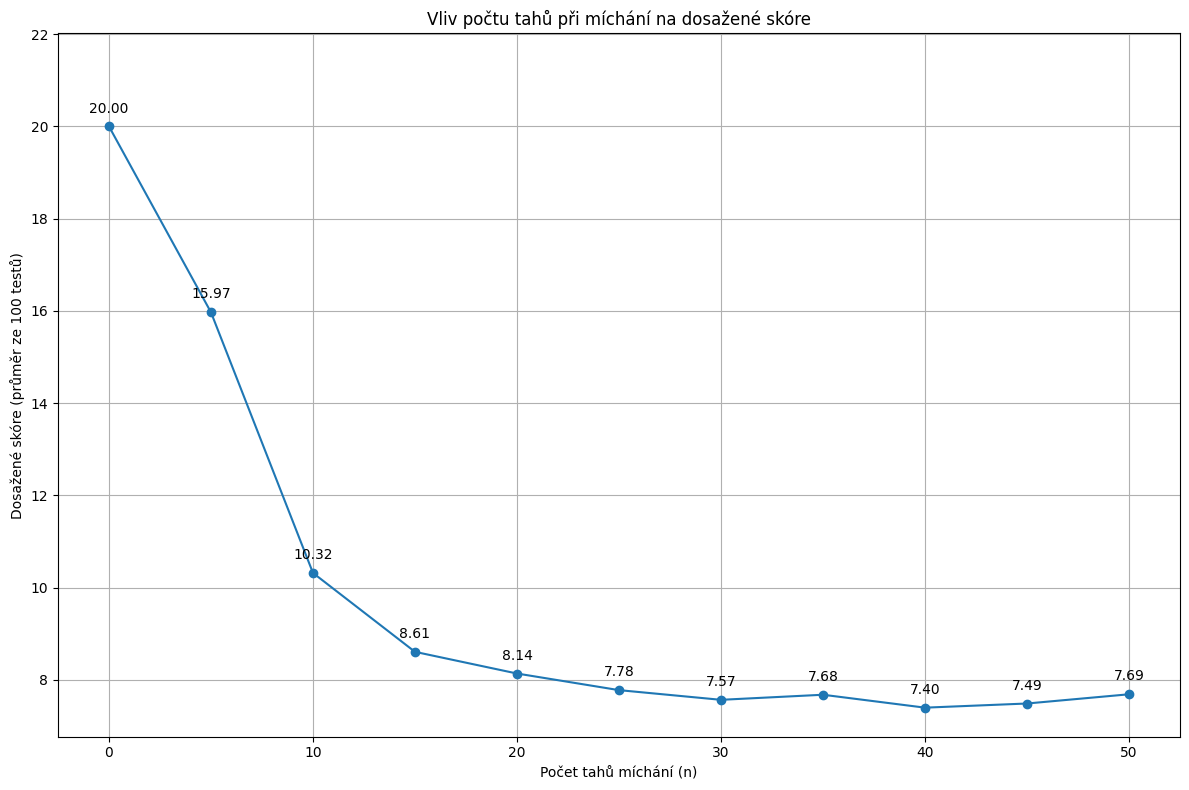

In [25]:
max_n = 50

n_values = range(0, max_n + 1, 5)
scores = []

for n in n_values:
    score, _, _, _, _, _ = test_solver(time_limit=100, search_depth=4, search_depth_g1=5, num_tests=100, num_moves=n)
    scores.append(score)

plt.figure(figsize=(12, 8)) 
plt.plot(n_values, scores, marker='o')

for i, score in enumerate(scores):
    plt.annotate(f'{score:.2f}', (n_values[i], score), textcoords="offset points", 
                    xytext=(0,10), ha='center', fontsize=10)

plt.title("Vliv počtu tahů při míchání na dosažené skóre")
plt.xlabel("Počet tahů míchání (n)")
plt.ylabel("Dosažené skóre (průměr ze 100 testů)")
plt.grid(True)

y_min, y_max = plt.ylim()
plt.ylim(y_min, y_max + (y_max - y_min) * 0.1)

plt.tight_layout()  
plt.savefig("scramble_moves_influence.png", dpi=300, bbox_inches="tight")
plt.show()

## Check for normality

Failed to build the project
stdout: 
stderr: Error: cabal: There is no <pkgname>.cabal package file or cabal.project file.
To build packages locally you need at minimum a <pkgname>.cabal file. You can
use 'cabal init' to create one.

For non-trivial projects you will also want a cabal.project file in the root
directory of your project. This file lists the packages in your project and
all other build configuration. See the Cabal user guide for full details.


Test 1/300
Shuffle: R D U D U D UP FP DP R LP DP R UP B UP RP UP FP LP
Stderr: Final score: 9.0

solution: ['B', 'U2', 'DP', 'B2', 'DP', 'R', 'D'], score: 9.0, duration: 0.11235809326171875
Test 2/300
Shuffle: BP L D UP R B RP B FP L F L B DP U BP DP BP RP D
Stderr: Final score: 8.0

solution: ['UP', 'DP', 'RP', 'B'], score: 8.0, duration: 0.11244440078735352
Test 3/300
Shuffle: LP DP UP F DP RP DP B FP L B L RP B LP BP R LP BP R
Stderr: Final score: 11.0

solution: ['F2', 'LP', 'D2', 'L', 'F', 'U', 'FP'], score: 11.0, duration: 0.

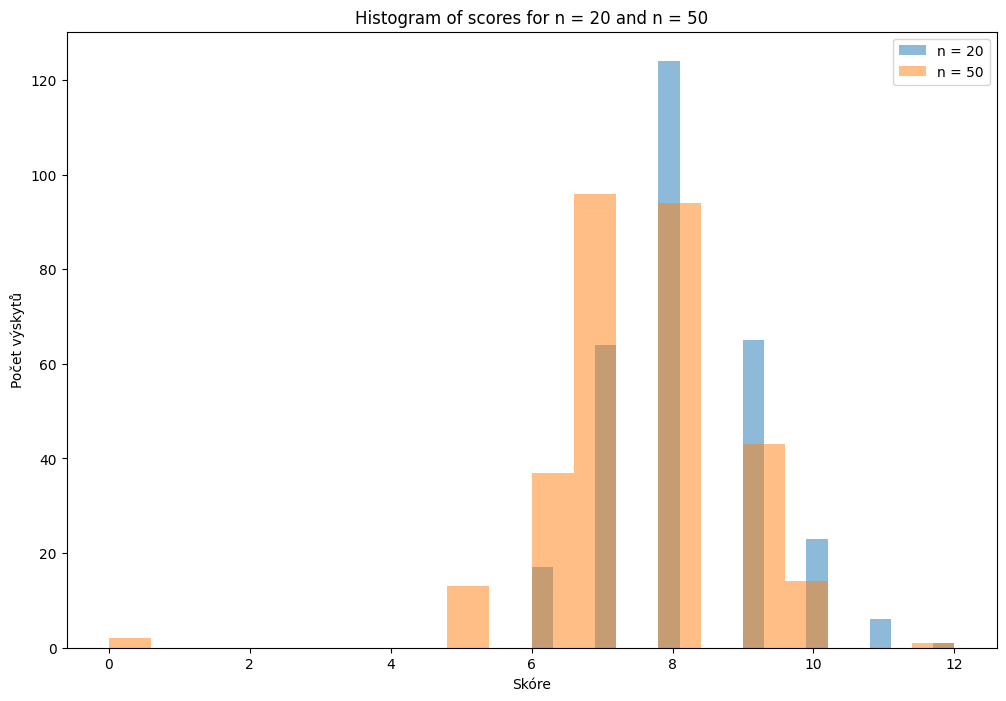

Shapiro-Wilk test for normality:
Scores1: W=0.9167742891839674, p-value=7.424946550155921e-12
Scores2: W=0.8870285922301975, p-value=4.1128856232580645e-14


In [28]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

time_limit = 100
search_depth = 4
search_depth_g1 = 5
num_tests = 300
n1 = 15
n2 = 20
n3 = 50

score1, _, _, scores1, _, _ = test_solver(time_limit=time_limit, search_depth=search_depth, search_depth_g1=search_depth_g1, num_tests=num_tests, num_moves=n1)
score2, _, _, scores2, _, _ = test_solver(time_limit=time_limit, search_depth=search_depth, search_depth_g1=search_depth_g1, num_tests=num_tests, num_moves=n2)
score3, _, _, scores3, _, _ = test_solver(time_limit=time_limit, search_depth=search_depth, search_depth_g1=search_depth_g1, num_tests=num_tests, num_moves=n3)

# plot and save histogram
plt.figure(figsize=(12, 8))
plt.hist(scores1, bins=20, alpha=0.5, label=f'n = {n1}')
plt.hist(scores2, bins=20, alpha=0.5, label=f'n = {n2}')
plt.hist(scores3, bins=20, alpha=0.5, label=f'n = {n3}')
plt.title(f"Histogram skóre pro n = {n1}, n = {n2} a n = {n3}")
plt.xlabel("Skóre")
plt.ylabel("Počet výskytů")
plt.legend(loc='upper right')
plt.savefig("histogram_scores.png", dpi=300, bbox_inches="tight")
plt.show()

# Shapiro-Wilk test for normality
shapiro_test1 = stats.shapiro(scores1)
shapiro_test2 = stats.shapiro(scores2)
shapiro_test3 = stats.shapiro(scores3)

print(f"Shapiro-Wilk test for normality:")
print(f"Scores1: W={shapiro_test1[0]}, p-value={shapiro_test1[1]}")
print(f"Scores2: W={shapiro_test2[0]}, p-value={shapiro_test2[1]}")
print(f"Scores3: W={shapiro_test3[0]}, p-value={shapiro_test3[1]}")
 

## Perform KS test

In [27]:
ks_statistic1, p_value1 = stats.ks_2samp(scores1, scores3)
ks_statistic2, p_value2 = stats.ks_2samp(scores2, scores3)

print(f"Kolmogorov-Smirnov test:")
print(f"Scores1 and Scores3: KS statistic={ks_statistic1}, p-value={p_value1}")
print(f"Scores2 and Scores3: KS statistic={ks_statistic2}, p-value={p_value2}")


Kolmogorov-Smirnov test: KS statistic=0.16, p-value=0.1548386665118475
